<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/A_Closed_form_Solution_to_Photorealistic_Image_Stylization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A Closed-form Solution to Photorealistic Image Stylization**

논문 링크: https://arxiv.org/abs/1802.06474

먼저 본 논문은 WCT를 기반으로 만들어졌기 때문에, WCT 논문을 먼저 읽고 오는 것을 추천한다.

지금까지 모든 style transfer 논문에서 나왔듯이 style transfer는 content image의 정보는 보존한채로 동시에 style image의 style이 입혀진 실제 image를 합성하는 것이 목표이다.

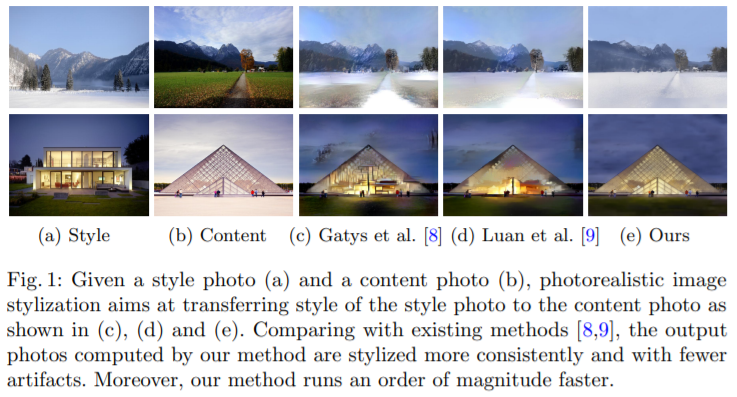

위의 그림 Figure 1을 보면 본 논문이 제시하는 기법과 기존 기법들의 style transfer 결과물의 차이를 알 수 있다. NN을 활용한 style transfer의 뼈대가 되는 기법인 (3)의 경우 종종 structural artifact와 distortions이 발생한다.

또한, Photorealism regularization과 Augmented style loss with semantic segmentation를 사용하여 기존의 기법을 발전시킨 (d) 부분의 경우도 의미적인 균일한 region에 일관성이 없는 style이 입혀진다.

(e) 부분이 본 논문의 결과물이다. 어떻게 이러한 결과물을 도출하였는지는 아래에서 살펴보겠다.

## **PhotoWCT 구조**

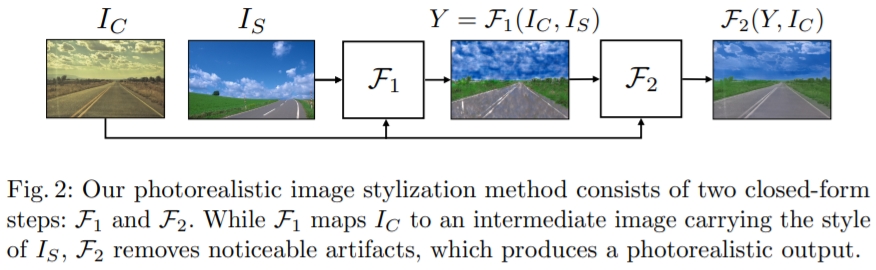

본 논문은 위의 그림 Figure 2에 나와있는 것과 같이 두 단계로 구성이 된다. 먼저, style image I_s가 주어지면, 이를 F_1에서 I_s의 style을 content image I_c로 전송하는 동시에 output image의 구조적 artifact를 최소화한다. F_1 단계에서 I_c를 충분히 style화 할 수 있지만, 의미적으로 유사한 region에서 일관성이 없는 style을 생성하는 경우가 있다.

따라서 이러한 **artifact를 제거하기 위해 photorealistic smoothing function인 F_2를 사용하여 artifact를 제거**한다. 

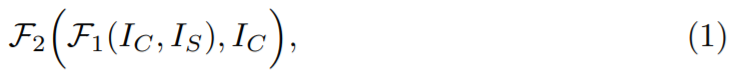

방금 위에서 설명한 내용을 식으로 나타내면 위의 식과 같다.

PhotoWCT는 이름에서 유추할 수 있듯이 WCT를 기반으로 한다. 간단하게 WCT의 핵심 아이디어를 설명해보자면, pretrained된 VGG-19를 encoder로 image의 feature를 빼오고 다시 이 image를 복구 시키는 decoder를 학습 시킨다. 그리고 encoder와 decoder 사이에 WCT(whitening and coloring transform)를 진행하는 것이 WCT의 핵심 아이디어다.

그러면 WCT와 PhotoWCT의 구체적인 차이점이 무엇이냐?

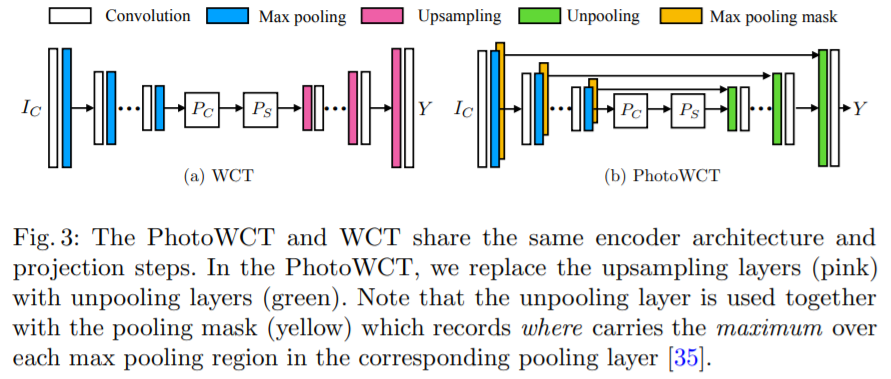

위에서 Figure 2를 봤을때 설명한 것을 보면 눈치를 챘을 수도 있지만, 바로 위의 그림 Figure 3과 같이 encoder 부분에서 max pooling mask를 decoder로 넘겨줌으로써 unpooling만으로도 기존 image 크기로 변경이 가능해졌다. 이를 통해 기존 WCT가 upsampling을 진행함으로써 생기는 feature map의 공간 정보를 감소시키는 문제를 해결하였다. 즉, PhotoWCT가 WCT보다 artifact가 훨씬 적다.

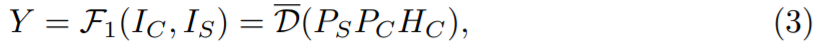

이를 수식으로 나타내면 위의 식과 같은데, 이 식에서 D^-는 pooling되지 않는 layer를 포함하고 image reconstructuon을 위해 훈련이 되는 decoder를 의미한다.

하지만 아직도 종종 의미적으로 유사한 region이 일관성이 없게 styling되는 경우가 있기 때문에 여전히 온전한 진짜 사진처럼 보이지 않는다. 따라서 본 논문은 결과를 보다 사실적으로 style transfer를 진행시키기 위하여 **photorealistic smoothing**을 적용하였다.

이 smoothing 단계에서는 총 두 가지를 목표로 하는데, 첫번째는 local neighborhood에 유사한 content를 가진 pixel도 유사하게 styling이 되어야 하다는 것이다. 그리고 두번째는 global style을 유지해야 한다. 당연하게도 PhtoWCT의 output과 차이가 크면 안되기 때문이다.

먼저, 모든 pixel을 graph node로 나타내고 pixel의 유사성을 묘사하기 위해 affinity matrix W = {w_ij} ∈ R^(N x N)을 정의해준다. (이때 N은 픽셀의 수이다.)

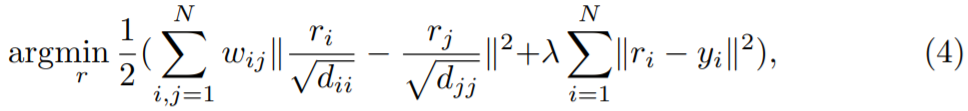

위의 식에서 y_i는 PhotoWCT의 결과물이고, r_i는 원하는 평활 output R의 pixel color이다. 그리고 변수 d_(ii)는 degree matrix D에 있는 대각선 요소이다. (EX. d_11, d_22, d_33 등) 그리고 위의 식을 통해 두 항의 균형을 제어한다. 이때 λ는 두 항의 비율을 조절하며, 그리고 y_i는 각 요소가 특정 항목에 들어가는 query인지 여부를 나타내는 binary input(0 또는 1)이다.

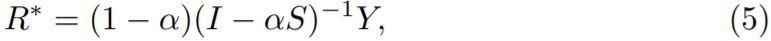

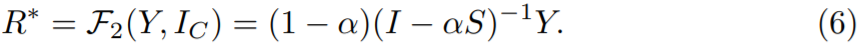

## **Experiments**

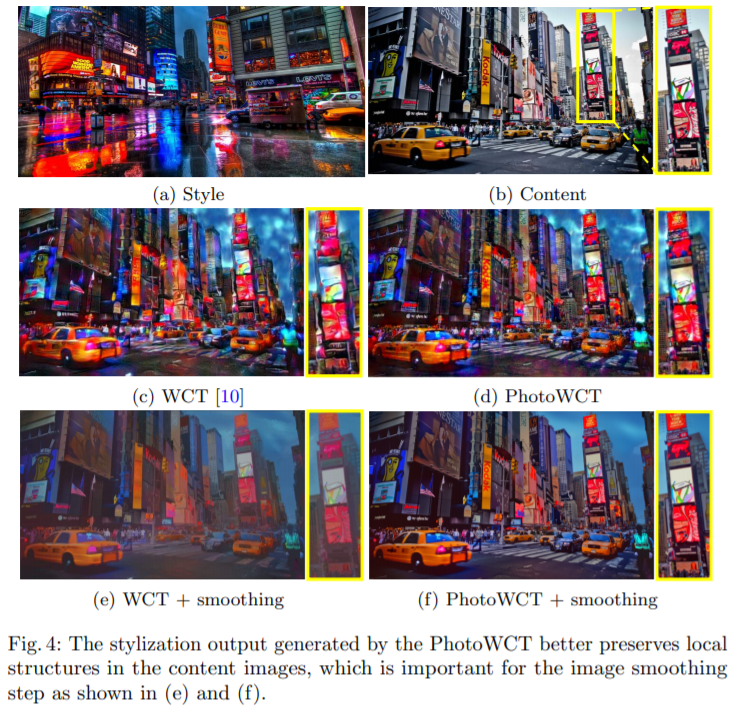

위의 그림 Figure 4를 보면 이러한 기법들을 통해 얻을 수 있는 이점을 알 수 있다. 먼저 (c)와 (d) 부분에서 특히 클로즈업된 부분을 보면 WCT는 image에 있는 건물이 지그재그로 변화하지만, PhotoWCT는 직선으로 보존이 잘되는 것을 볼 수 있다.

그리고 (e)와 (f) 부분은 각각 WCT와 PhotoWCT에 smoothing 기법을 추가한 것인데, WCT에 적용시킨 (e) 부분의 경우는 (c) 부분에 있었던 구조적인 artifact를 제거하였지만, content image와 WCT output이 공간 왜곡으로 인해 심하게 어긋나기 때문에 만족스러운 결과가 나오지 않는다.

반면, (f)의 경우는 만족스러운 결과물을 보여준다. 이를 통해 왜곡을 제거하기 위해 PhotoWCT를 사용해야함을 알 수 있다.

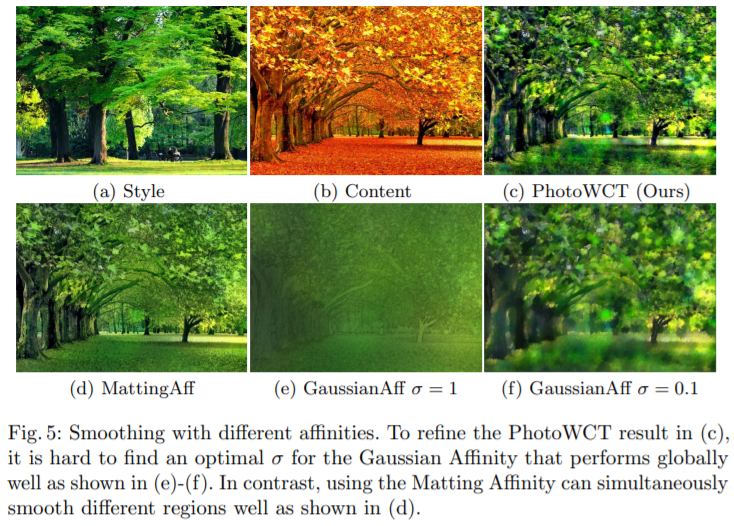

위의 그림 Figure 5에서 (e) 부분과 (f) 부분을 보면, global하게 잘 수행이 되는 Gaussian Affinity에 대한 최적의 σ값을 찾는게 어렵다는 것을 알 수 있다. 반대로 **Matting Affinity**을 사용하면 (d) 부분과 같이 보다 좋은 품짐을 얻을 수 있다.

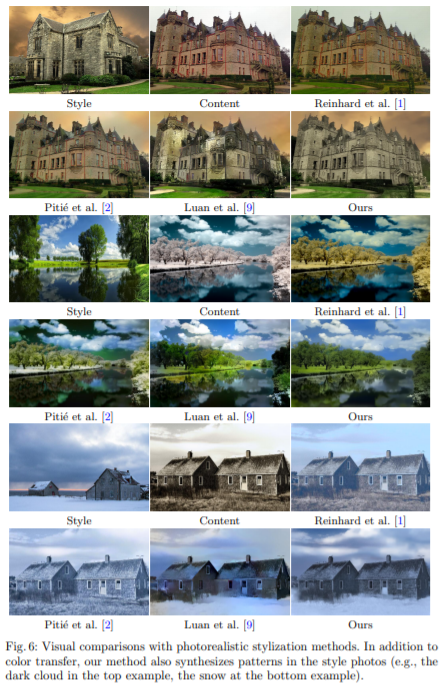

위의 그림 Figure 6은 기존의 phtorealistic stylization 기법들과 결과물을 비교한 것이다. 먼저, Reinhard et al이나 Piti´e et al의 경우는 모두 content image의 색상은 변경하지만, 제대로된 style을 전송하진 못한다. 본 논문에서는 photorealistic stylization은 단순히 색상 전달 뿐만아니라 style image의 패턴이 content image에 입혀져야 한다고 주장을 한다. 예를 들어 위의 그림 Figure 6의 가장 아래에 있는 부분의 경우 본 논문의 PhotoWCT는 지면 region을 단순히 흰색으로 변경할 뿐만아니라 style image의 눈 패턴도 합성을 진행한다.

그리고 Luan et al의 경우 한 눈에 보기엔 매우 좋은 style화 결과물을 도출하는거 같지만, 자세히 보면 생성된 image에 눈에 띄는 noticeable artifact(EX. 건물과 나무의 불규칙한 발기 등)이 포함되어 있다. 즉, 의미상 유사한 region에 일관성이 없다.

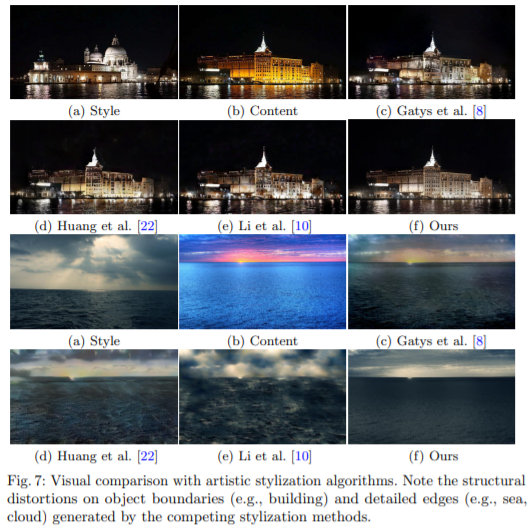

위의 그림 Figure 7도 위의 그림 Figure 6과 비슷하게 다른 기법들을 가져와서 결과물을 비교한 것이다. 본 논문의 PhotoWCT를 제외한 다른 기법들은 style을 잘 전송하지만, 눈에 띄는 artifact가 생기는 등 image 전체에 일관되지 않는 style을 렌더링한다. 반면 PhotoWCT의 경우 더욱 사실적인, photorealistic한 결과물을 도출해낸다.

photorealistic image stylization은 매우 주관적인 작업이기 때문에, 성능 평가를 위해 사용자 평가에 의존할 수 밖에 없다. 본 논문은 평가를 위해 타 논문들처럼 AMT(Amazon Mechanical Turk) 플랫폼을 이용하였다. 각 질문에서 평가자에게 content image & style image 쌍과 여러 기법들의 결과를 무작위 순서로 보여주어, 선호도 점수를 받는다.

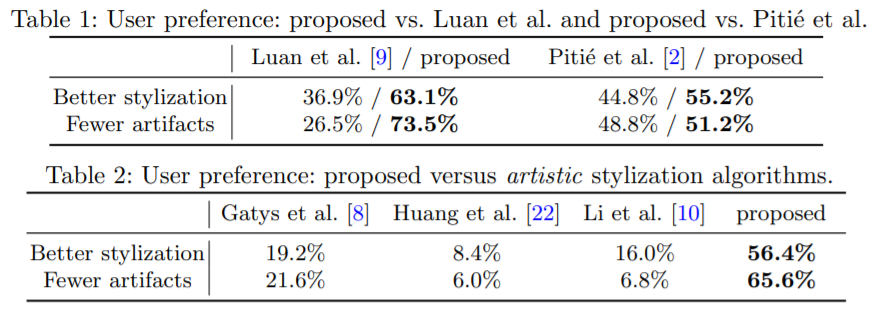

그에 따른 결과물이 위의 표들 Table 1과 Table 2인데, 먼저 Table 1에서 Luan et al 기법과 비교한 결과를 보면 평가자의 63.1%가 PhotoWT를 더 선호하며, 73.5%가 더 사실적이라고 평가했다. 그리고 Piti'e의 경우도 55.2%가 더 좋다고 평가하였다.

Table 2는 여러 기법들과 동시에 비교하였는데, 다른 기법들보다 훨씬 뛰어난 것을 알 수 있다.

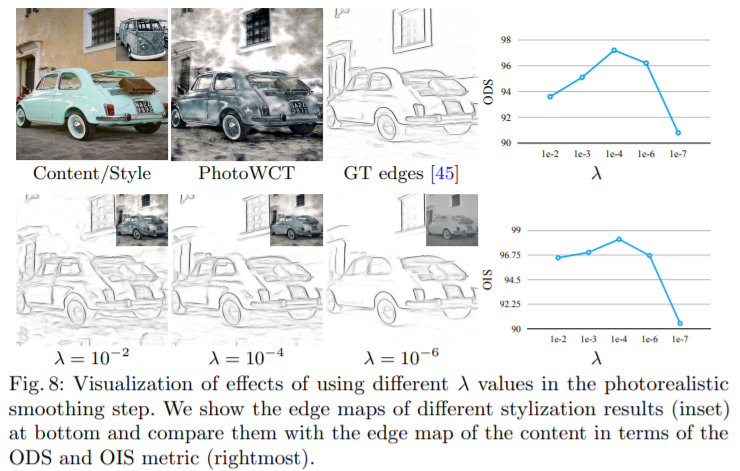

위의 그림 Figure 8은 λ에 따른 결과를 분석한 것이다. λ가 작을수록 결과물이 더 부드러워지며, λ가 클수록 query에 충실한 결과물을 렌더링한다. **일반적으로 λ를 줄이면 artifact를 줄이는데 도움이 되므로 phto realism이 향상된다.** 그러나 λ가 너무 작으면 지나치게 부드러워지기 때문에 본 논문에서는 grid search를 통하여 최적의 λ을 찾았다. 결과적으로 본 논문은 모든 실험에서 **λ를 10^-4로 설정**하였다.

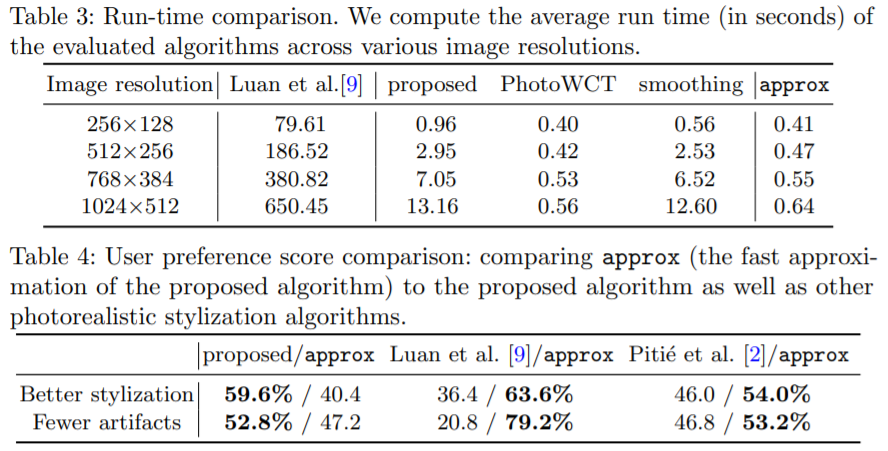

위의 표 Table 3은 run-time을 최신 기법들과 비교한 것이다. NVIDIA Titan X Pascal GPU 기준으로 1024 x 512 image에 대해 style화 시키기 위해 **13.16초**가 소모되며, Luan et al이 달성한 650.45초보다 약 49배나 빠르다. 그리고 표 Table 4는 표 Table 1과 같이 성능을 비교한 것이다.

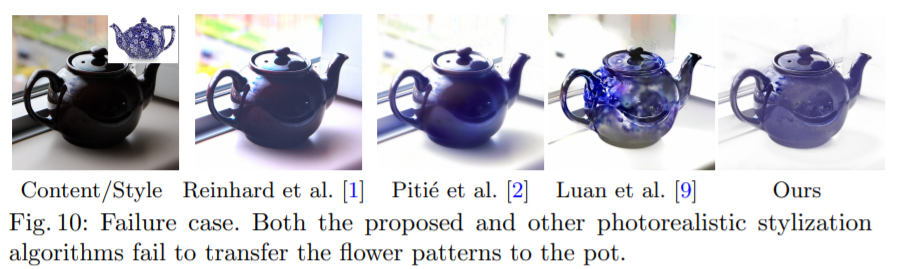

위의 그림 Figure 10은 실패 사례를 보여준다.